Data Creation

In [1]:
import pdfplumber
import docx
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Function for PDF File Loader

In [2]:
def extract_text_from_pdf(file_path):
    with pdfplumber.open(file_path) as pdf:
        text = "\n".join(page.extract_text() for page in pdf.pages if page.extract_text())
    return text

Function for Docx File Loader

In [3]:
def extract_text_from_docx(file_path):
    doc = docx.Document(file_path)
    text = "\n".join(para.text for para in doc.paragraphs)
    return text

In [4]:
def dataset(dirname):
    data_list =[]
    for dir in os.listdir("Resume_Custom_Data"):
        for files in os.listdir(os.path.join('Resume_Custom_Data',dir)):
            file_path = os.path.join('Resume_Custom_Data',dir, files)
            if file_path.endswith(".pdf"):
                text = extract_text_from_pdf(file_path)
            elif file_path.endswith(".docx"):
                text = extract_text_from_docx(file_path)
            label= files.split('.')[0]
            data = {
                    'Text': text,
                    'label':dir
                }
            data_list.append(data)
    df = pd.DataFrame(data_list)
    return df

In [5]:
df = dataset('Resume_Custom_Data')

In [6]:
df.head()

,Text,label
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
1,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
2,Anubhav Kumar Singh\t\t\n\n To work in a gl...,Peoplesoft
3,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft
4,Murali\n\nExperience Summary \n\nI have 6 year...,Peoplesoft


In [7]:
df['Text'][7]

" PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Objective:\n\nI have total 4.2 Years’ Experience in PeopleSoft Admin and PeopleSoft DBA. I hope to enhance my skill set while adding value to the business, to enable implementation of solutions, which aid the company’s objectives, understanding and anticipating the needs, interests and motivations of the clients and to deliver on time, budget and to quality, delivering value through improving agility, quality and reliability\n\nProfessional Summary:\n\nHaving 4.2 years of experience in PeopleSoft implementation, Support, People Tools Upgrades, configuration, migrations, maintenance and administration of Application Server Domains, Process Scheduler Servers, Web Server Domains, PUM and Elastic search.\nInvolved in various Tools and Application Upgrades.\nExperience in driving Infrastructure Hardware Upgrades, Disaster Recovery Activities.\nConfigured https and secure web server (SSL) administration.\nMonitor system by developing and maintainin

In [8]:
df.isna().sum()

Text     0
label    0
dtype: int64

## Visualization of Resumes Categories

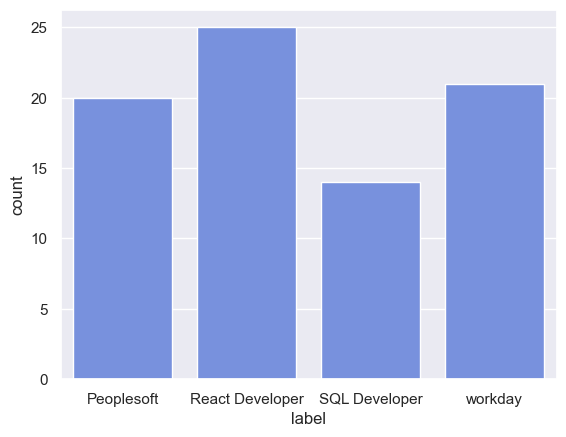

In [9]:
sns.set_theme(style="darkgrid",palette="coolwarm")
sns.countplot(x = df['label'])
plt.show()

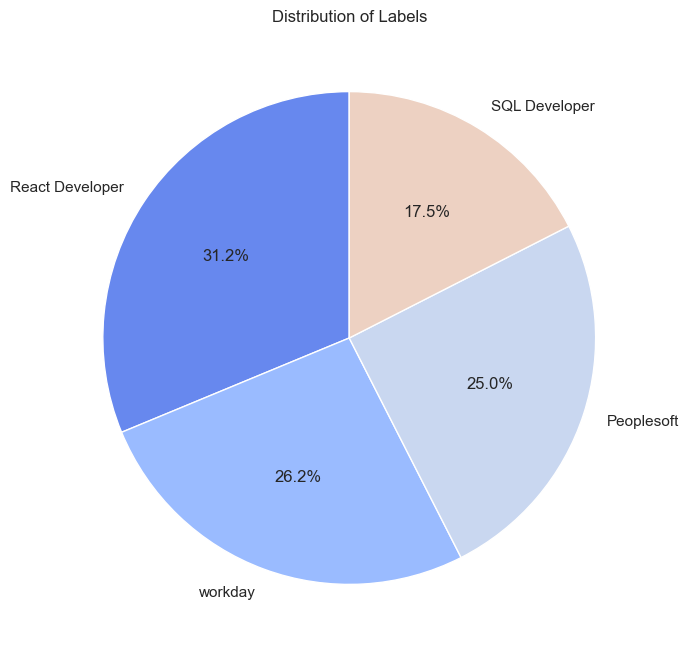

In [10]:
label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Labels')
plt.show()

In [11]:
df['label'].value_counts()

label
React Developer    25
workday            21
Peoplesoft         20
SQL Developer      14
Name: count, dtype: int64

In [12]:
df['label'] = df['label'].map({'React Developer': 0,'workday': 1 ,'Peoplesoft': 2 , 'SQL Developer': 3})

In [13]:
df

,Text,label
0,Anubhav Kumar Singh\t\t\n\n To work in a gl...,2
1,Anubhav Kumar Singh\t\t\n\n To work in a gl...,2
2,Anubhav Kumar Singh\t\t\n\n To work in a gl...,2
3,Murali\n\nExperience Summary \n\nI have 6 year...,2
4,Murali\n\nExperience Summary \n\nI have 6 year...,2
...,...,...
75,Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,1
76,Seeking suitable positions in Workday HCM as ...,1
77,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,1
78,\nWORKDAY | HCM | FCM\nName \t\t: Kumar S.S\nR...,1


In [14]:
df['Text'][3]

'Murali\n\nExperience Summary \n\nI have 6 years of experience working in PeopleSoft Administration and performing various infrastructure related activities in PeopleSoft environments. \n\nInstalled and configured PeopleSoft 9.0,9.1,9.2 Web server, Application server, Database server and Process scheduler \nserver on Windows, UNIX and Linux platforms.\nCreating Domains for Web server, Application server and Process scheduler server.\nApplied Patches Manually and applied Maintenance Packs through Change Assistant tool.\nExperience in DPKs installations.\nApplying TAX UPDATES and fixes using PUM\nMigrating projects from one environment to another environment using Application Designer and also through CAPI, STAT tools.\nPerformed Single sign on (SSO)Implementation.\nExperience in running Compare Reports between pre and Post Migrations.\nExperience in setting up Client Workstation for Developers and Testers.\nInvolved in Configuration of Integration Broker setting up Between the Modules f

In [15]:
df['Text'][75]

'Ramesh A\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\n(Workday HCM Consultant)\n\n\nPROFESSIONAL SUMMARY:\nAn ERP Consultant with overall\xa05+ years\xa0of professional IT experience with\xa03+ years\xa0of extensive\xa0Workday experience.\nExceptional experience in Workday’s\xa0Core HR, Staffing and Compensation Functional areas.\nHands on experience in Configuring Organizations, Business process and creation of Custom Reports.\nExperienced on Compensation elements configurations and updates.\nInvolved in requirements analysis, integrations, testing and system documentation support.\nCreation of various\xa0calculated fields\xa0to use in custom reports.\nConfiguring\xa0EIB Inbound and Load data into workday with webservices.\nCreation of various custom reports as per the requirements.\nWorking on various enhancements related to EIB Integrations, Custom Reports and Configuration changes.\nExperience with creating\xa0Staffing models for Supervisory Orgs, Reorganizations and business process fr

## Data Preprocessing

In [16]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [18]:
Lemmatizer = WordNetLemmatizer()

In [19]:
def preprocess_data(text):
    cleantext = re.sub(r'http\S+|www\.\S+', '',text)
    cleantext = re.sub(r'@\S+','',cleantext)
    cleantext = re.sub(r'#\S+','',cleantext)
    cleantext = re.sub(r'[^\w\s]','',cleantext)
    cleantext = cleantext.lower()
    words = word_tokenize(cleantext)
    words = [Lemmatizer.lemmatize(word,pos='v') for word in words if not word in stopwords.words('english')]
    cleantext = ' '.join(words)
    return cleantext

In [20]:
def preprocess_data2(text):
  cleantext = re.sub('[^a-zA-Z]',' ',text)
  return cleantext

In [21]:
df['Text'] = df['Text'].apply(preprocess_data)

In [22]:
df['Text'] = df['Text'].apply(preprocess_data2)

## Vectorization

In [23]:
import gensim

In [24]:
from gensim.models import Word2Vec, KeyedVectors
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [25]:
words = []
for sent in df['Text']:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [26]:
model = gensim.models.Word2Vec(words)

In [27]:
model

In [28]:
model.epochs

5

In [29]:
len(model.wv.index_to_key)

1003

In [30]:
model.wv['workday']

array([ 0.21139471,  0.1924552 , -0.10353765,  0.21991292,  0.04807653,
       -0.41041595,  0.40735048,  0.45175895, -0.34214205, -0.0275453 ,
       -0.2919126 , -0.09570135, -0.22529379,  0.07723788,  0.07466012,
       -0.25432396, -0.3285822 , -0.14234768, -0.04464968, -0.31616017,
        0.3755757 ,  0.23069048,  0.31111446,  0.10073706, -0.08149893,
       -0.23164083, -0.01562916, -0.07955538, -0.01403448, -0.18812084,
        0.30918035, -0.04119814,  0.2549664 , -0.21510497,  0.13470402,
        0.61526924,  0.2599687 ,  0.02774662, -0.2563525 , -0.5021528 ,
       -0.15974799, -0.29117745, -0.18090145,  0.12105704,  0.23222531,
       -0.07684138, -0.2305491 ,  0.2389039 ,  0.40637186,  0.2533168 ,
        0.22303812, -0.4851038 ,  0.09618975, -0.25357997, -0.3114103 ,
        0.07200546, -0.13746168, -0.5868758 , -0.52730346,  0.01084921,
        0.1676061 ,  0.02207848, -0.07897069, -0.19693722, -0.35672104,
        0.22176205,  0.041003  ,  0.5667628 , -0.8259523 ,  0.34

In [31]:
def avg_word_2_vec(doc): 
  return np.mean([model.wv[word] for word in doc.split() if word in model.wv.index_to_key],axis=0)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
Train_df,Test_df = train_test_split(df,test_size=0.2,random_state=42)

In [34]:
x_Train,y_Train = Train_df['Text'],Train_df['label']
x_Test,y_Test = Test_df['Text'],Test_df['label']

In [35]:
x_Train_Final = []
for sent in x_Train:
  x_Train_Final.append(avg_word_2_vec(sent))

In [36]:
x_Test_Final = []
for sent in x_Test:
  x_Test_Final.append(avg_word_2_vec(sent))

## Model Building with Machine Learning Algorithms

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid',palette='viridis')

In [45]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(multi_class='ovr'),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'SVM':SVC(decision_function_shape='ovo'),
    'KNN':KNeighborsClassifier(),
    'XGBoost':XGBClassifier()
}

In [46]:
metrics = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Train Precision': [],
    'Test Precision': [],
    'Train Recall': [],
    'Test Recall': [],
    'Train F1-Score': [],
    'Test F1-Score': []
}

In [47]:
for model_name, model in models.items():
    model.fit(x_Train_Final,y_Train)
    y_train_pred = model.predict(x_Train_Final)
    y_test_pred = model.predict(x_Test_Final)

    metrics['Model'].append(model_name)
    metrics['Train Accuracy'].append(accuracy_score(y_Train, y_train_pred))
    metrics['Test Accuracy'].append(accuracy_score(y_Test, y_test_pred))
    metrics['Train Precision'].append(precision_score(y_Train, y_train_pred,average='weighted'))
    metrics['Test Precision'].append(precision_score(y_Test, y_test_pred,average='weighted'))
    metrics['Train Recall'].append(recall_score(y_Train, y_train_pred,average='weighted'))
    metrics['Test Recall'].append(recall_score(y_Test, y_test_pred,average='weighted'))
    metrics['Train F1-Score'].append(f1_score(y_Train, y_train_pred,average='weighted'))
    metrics['Test F1-Score'].append(f1_score(y_Test, y_test_pred,average='weighted'))

In [48]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train F1-Score,Test F1-Score
0,Random Forest,1.000000,0.9375,1.000000,0.946429,1.000000,0.9375,1.000000,0.936432
1,Logistic Regression,0.562500,0.4375,0.560268,0.526786,0.562500,0.4375,0.500200,0.426648
2,Decision Tree Classifier,1.000000,0.9375,1.000000,0.946429,1.000000,0.9375,1.000000,0.936432
3,SVM,0.296875,0.3750,0.088135,0.140625,0.296875,0.3750,0.135919,0.204545
4,KNN,0.906250,0.9375,0.906757,0.946429,0.906250,0.9375,0.905306,0.936432
5,XGBoost,1.000000,0.9375,1.000000,0.946429,1.000000,0.9375,1.000000,0.936432


## Visualization 

Comparison of Accuracy

In [49]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of Accuracies By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

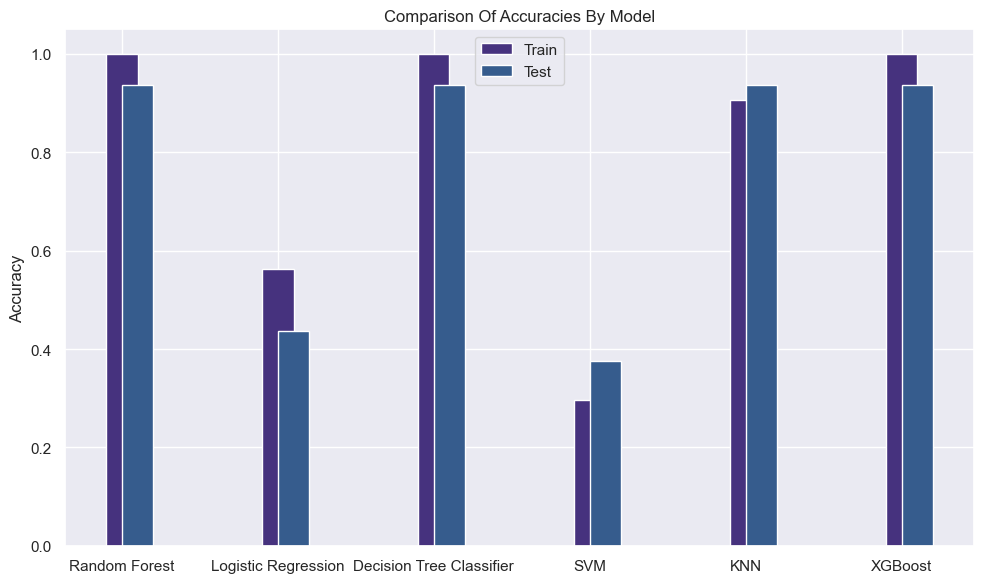

In [50]:
plot_metric("Train Accuracy", "Test Accuracy", "Accuracy")

## Comparison of Precision

In [51]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of Precision By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

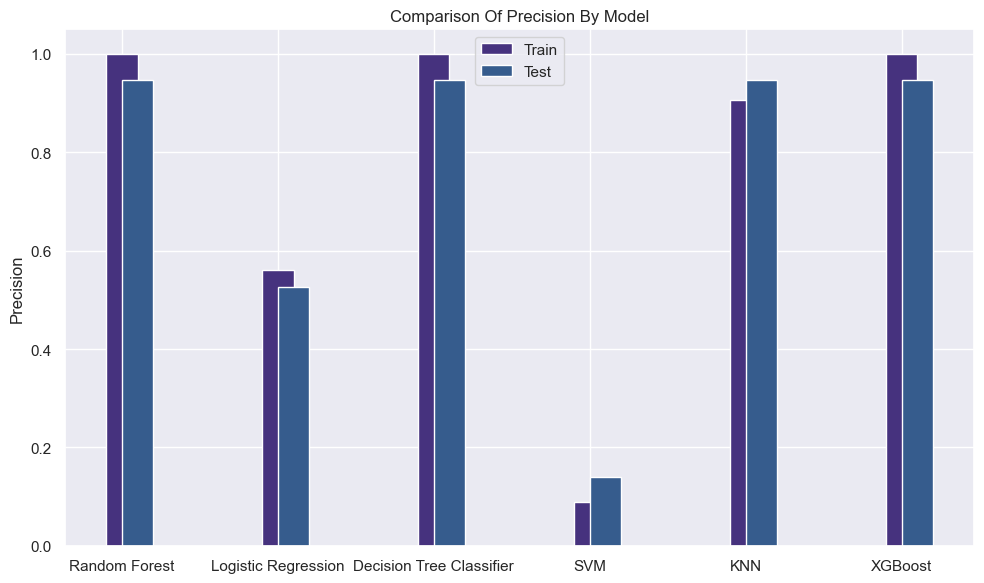

In [52]:
plot_metric("Train Precision", "Test Precision", "Precision")

## Comparison of Recall

In [53]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of Recall By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

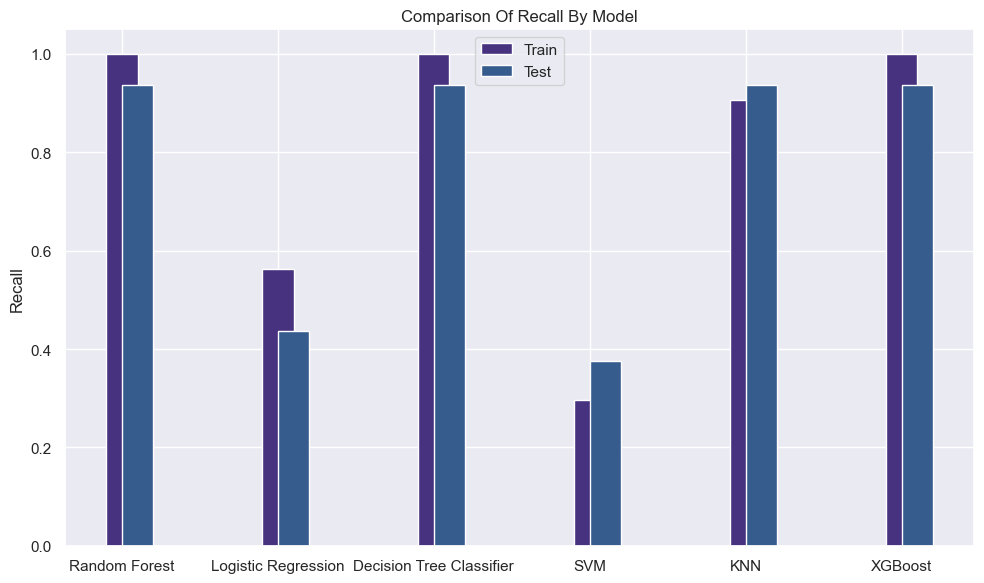

In [54]:
plot_metric("Train Recall", "Test Recall", "Recall")

## Comparison of F1-Score

In [55]:
def plot_metric(metric_train, metric_test, metric_name):
    x = np.arange(len(models))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x, metrics_df[metric_train], width=0.2, label='Train',align='center')
    ax.bar(x, metrics_df[metric_test], width=0.2, label='Test',align='edge')
    ax.set_ylabel(metric_name)
    ax.set_title('Comparison Of F1-Score By Model')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics_df['Model'])
    ax.legend(loc='upper center')
    plt.tight_layout()
    plt.show()

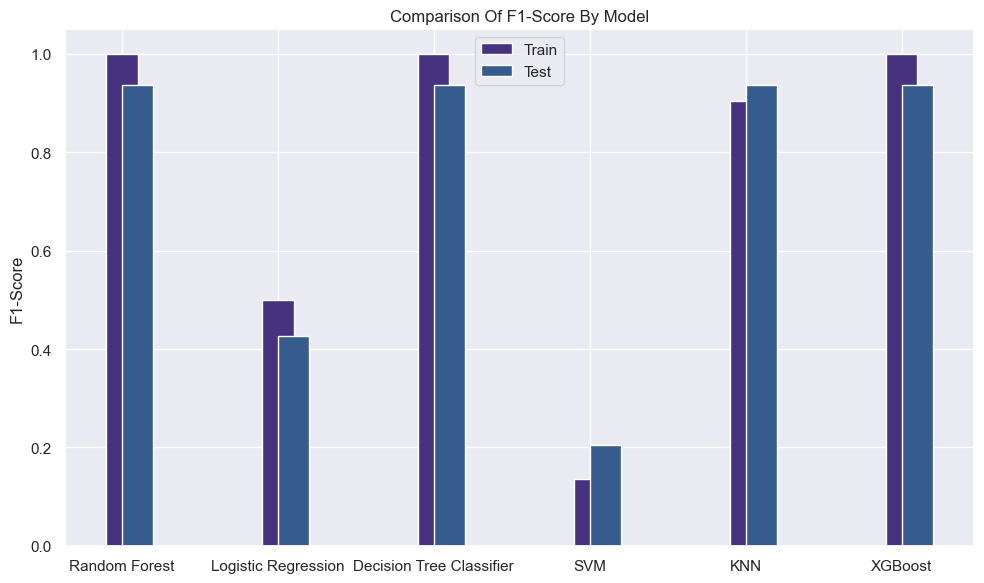

In [56]:
plot_metric("Train F1-Score", "Test F1-Score", "F1-Score")

## Model Building with Deep Learning

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [58]:
DL_df = dataset('Resume_Custom_Data')

In [59]:
DL_df = DL_df.sample(frac=1)

In [60]:
DL_df

,Text,label
27,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...,React Developer
43,Ranga Gaganam \n \n \nHaving 1+ years of succ...,React Developer
19,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...,Peoplesoft
30,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...,React Developer
39,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...,React Developer
...,...,...
8,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...,Peoplesoft
66,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...,workday
44,SHAIK ABDUL SHARUK \n2 years’ Experience in ...,React Developer
76,Seeking suitable positions in Workday HCM as ...,workday


In [61]:
y = pd.get_dummies(DL_df['label'],dtype=int)
y

,Peoplesoft,React Developer,SQL Developer,workday
27,0,1,0,0
43,0,1,0,0
19,1,0,0,0
30,0,1,0,0
39,0,1,0,0
...,...,...,...,...
8,1,0,0,0
66,0,0,0,1
44,0,1,0,0
76,0,0,0,1


In [62]:
DL_df.drop(columns=['label'],inplace=True)

In [63]:
DL_df

,Text
27,\nPRAGNYA PATTNAIK\n \n \n \n Expertise: \n \...
43,Ranga Gaganam \n \n \nHaving 1+ years of succ...
19,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nC O N ...
30,\n\nThirupathamma Balla\n\nSUMMARY:\n\n2.8 yea...
39,MD KHIZARUDDIN RAUF \n \t EXPERIENCE \n \n...
...,...
8,PeopleSoft Admin\nVARKALA VIKAS\n\nCareer Obj...
66,\n\nJYOTI VERMA\t\t\t\t\t\n\n\n\n3 years of Ex...
44,SHAIK ABDUL SHARUK \n2 years’ Experience in ...
76,Seeking suitable positions in Workday HCM as ...


In [64]:
DL_df['Text'] = DL_df['Text'].apply(preprocess_data)

In [65]:
DL_df['Text'] = DL_df['Text'].apply(preprocess_data2)

In [66]:
x = DL_df['Text']
x.shape

(80,)

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [68]:
tokenizer = Tokenizer()

In [69]:
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [70]:
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [71]:
x_train_pad = pad_sequences(x_train_seq,maxlen=500,padding='post')
x_test_pad = pad_sequences(x_test_seq,maxlen=500,padding='post')

In [72]:
x_train_pad.shape,x_test_pad.shape

((64, 500), (16, 500))

In [73]:
vocab_size = len(tokenizer.word_index)+1
vocab_size

2885

## Simple RNN Model

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Embedding,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=500))
model_rnn.add(SimpleRNN(64,activation='relu',return_sequences=True))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(4,activation='softmax'))

model_rnn.compile(optimizer = Adam(),loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_rnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          369280    
                                                                 
 simple_rnn (SimpleRNN)      (None, 500, 64)           12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
Total params: 384,868
Trainable params: 384,868
Non-trainable params: 0
_________________________________________________________________


In [76]:
earlystopping_srnn = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
earlystopping_srnn

In [77]:
history = model_rnn.fit(
    x_train_pad,y_train,
    epochs=11,
    batch_size = 32,
    validation_data = (x_test_pad,y_test),
    callbacks = earlystopping_srnn
)

Epoch 1/11
2/2 [==============================] - 3s 671ms/step - loss: 1.3579 - accuracy: 0.3906 - val_loss: 1.2354 - val_accuracy: 0.5625
Epoch 2/11
2/2 [==============================] - 0s 255ms/step - loss: 1.1125 - accuracy: 0.5938 - val_loss: 1.2156 - val_accuracy: 0.2500
Epoch 3/11
2/2 [==============================] - 0s 272ms/step - loss: 0.9742 - accuracy: 0.7500 - val_loss: 1.1784 - val_accuracy: 0.5000
Epoch 4/11
2/2 [==============================] - 0s 216ms/step - loss: 0.9040 - accuracy: 0.8281 - val_loss: 1.0979 - val_accuracy: 0.5625
Epoch 5/11
2/2 [==============================] - 0s 260ms/step - loss: 0.8489 - accuracy: 0.8438 - val_loss: 1.0991 - val_accuracy: 0.5625
Epoch 6/11
2/2 [==============================] - 0s 237ms/step - loss: 0.7949 - accuracy: 0.8594 - val_loss: 1.0262 - val_accuracy: 0.6875
Epoch 7/11
2/2 [==============================] - 0s 233ms/step - loss: 0.7483 - accuracy: 0.8906 - val_loss: 0.9550 - val_accuracy: 0.7500
Epoch 8/11
2/2 [====

## LSTM RNN Model

In [78]:
from tensorflow.keras.layers import LSTM

In [79]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=500))
model_lstm.add(LSTM(64,activation='relu',return_sequences=True))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(4,activation='softmax'))

model_lstm.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 128)          369280    
                                                                 
 lstm (LSTM)                 (None, 500, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 4)                 132       
                                                                 
Total params: 431,236
Trainable params: 431,236
Non-trainable params: 0
_________________________________________________________________


In [80]:
earlystopping_lstm = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
earlystopping_lstm

In [81]:
history = model_lstm.fit(
    x_train_pad,y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad,y_test),
    callbacks=earlystopping_lstm
)

Epoch 1/10
2/2 [==============================] - 5s 1s/step - loss: 1.3822 - accuracy: 0.3438 - val_loss: 1.3809 - val_accuracy: 0.3750
Epoch 2/10
2/2 [==============================] - 1s 526ms/step - loss: 1.3698 - accuracy: 0.4688 - val_loss: 1.3726 - val_accuracy: 0.3750
Epoch 3/10
2/2 [==============================] - 1s 500ms/step - loss: 1.3565 - accuracy: 0.5156 - val_loss: 1.3646 - val_accuracy: 0.4375
Epoch 4/10
2/2 [==============================] - 1s 498ms/step - loss: 1.3421 - accuracy: 0.5625 - val_loss: 1.3575 - val_accuracy: 0.4375
Epoch 5/10
2/2 [==============================] - 1s 488ms/step - loss: 1.3250 - accuracy: 0.6094 - val_loss: 1.3518 - val_accuracy: 0.4375
Epoch 6/10
2/2 [==============================] - 1s 480ms/step - loss: 1.3088 - accuracy: 0.6094 - val_loss: 1.3549 - val_accuracy: 0.4375
Epoch 7/10
2/2 [==============================] - 1s 361ms/step - loss: 1.2961 - accuracy: 0.6094 - val_loss: 1.3636 - val_accuracy: 0.4375
Epoch 8/10
2/2 [=======

## GRU RNN Model

In [82]:
from tensorflow.keras.layers import GRU

In [83]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size,output_dim=128,input_length=500))
model_gru.add(GRU(100,activation='relu',return_sequences=True))
model_gru.add(GRU(34))
model_gru.add(Dense(4,activation='softmax'))

model_gru.compile(optimizer = Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          369280    
                                                                 
 gru (GRU)                   (None, 500, 100)          69000     
                                                                 
 gru_1 (GRU)                 (None, 34)                13872     
                                                                 
 dense_2 (Dense)             (None, 4)                 140       
                                                                 
Total params: 452,292
Trainable params: 452,292
Non-trainable params: 0
_________________________________________________________________


In [84]:
earlystopping_gru = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
earlystopping_gru

In [85]:
history = model_gru.fit(
    x_train_pad,y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test_pad,y_test),
    callbacks=earlystopping_gru
)

Epoch 1/10
2/2 [==============================] - 6s 1s/step - loss: 1.3824 - accuracy: 0.3438 - val_loss: 1.3786 - val_accuracy: 0.3125
Epoch 2/10
2/2 [==============================] - 1s 382ms/step - loss: 1.3607 - accuracy: 0.4375 - val_loss: 1.3754 - val_accuracy: 0.3125
Epoch 3/10
2/2 [==============================] - 1s 399ms/step - loss: 1.3437 - accuracy: 0.4688 - val_loss: 1.3724 - val_accuracy: 0.3125
Epoch 4/10
2/2 [==============================] - 1s 405ms/step - loss: 1.3274 - accuracy: 0.4688 - val_loss: 1.3714 - val_accuracy: 0.3125
Epoch 5/10
2/2 [==============================] - 1s 426ms/step - loss: 1.3064 - accuracy: 0.4688 - val_loss: 1.3716 - val_accuracy: 0.3125
Epoch 6/10
2/2 [==============================] - 1s 376ms/step - loss: 1.2918 - accuracy: 0.5000 - val_loss: 1.3765 - val_accuracy: 0.3750
Epoch 7/10
2/2 [==============================] - 1s 390ms/step - loss: 1.2706 - accuracy: 0.5625 - val_loss: 1.3835 - val_accuracy: 0.3750
Epoch 8/10
2/2 [=======